In [2]:
import sympy
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.ipy_sympy import *
import scipy.linalg

/usr/lib64/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib64/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [94]:
a, b, c= sympy.var('a, b, c')
ac, bc, cc = a.conjugate(), b.conjugate(), c.conjugate()
X = sympy.ps_In * sympy.Matrix([
[0,        0,        1 * bc, 0,        1 * c,   0],
[0,        0,        1 * ac, 1 * c,   0,        0],
[2 * b,   2 * a,   0,       0,        0,        0],
[0,        -1 * cc, 0,       0,        0,        -1 * b],
[-1 * cc, 0,        0,       0,        0,        -1 * a],
[0,        0,        0,       -2 * bc, -2 * ac, 0],       
])

X = sympy.ps_In * sympy.Matrix([
[0,       1 * ac, 1 * c,   0],
[2 * a,   0,      0,       0],
[-1 * cc, 0,      0,       -1 * a],
[0,       0,      -2 * ac, 0],      
])

RX = sympy.Matrix([a,c,ac,cc])

G = np.matrix([
    [0,  0,  0,  1, 0, 0],
    [0,  0,  0,  0, 1, 0],
    [0,  0,  0,  0, 0, 1],
    [-1, 0,  0,  0, 0, 0],
    [0,  -1, 0,  0, 0, 0],
    [0,  0,  -1, 0, 0, 0],
])

In [108]:
dX = X * RX
tau = .1
X2 = X.subs([(a, a + tau * dX[0]/4), (c, c + tau * dX[1]/4)])

In [109]:
R = np.matrix([.1,0,1,.1,0,1]).T
subs = [(a, 1), (b, 0.02003302j), (c, 1j)]
T = np.matrix(X2.subs(subs).evalf()).astype(complex)
R = np.matrix(RX.subs(subs).evalf()).astype(complex)
#R = np.matrix([1,1j,1,-1j]).T

In [110]:
T

matrix([[ 0.00+0.j    ,  0.00+0.9475j, -1.05+0.j    ,  0.00+0.j    ],
        [ 0.00+1.895j ,  0.00+0.j    ,  0.00+0.j    ,  0.00+0.j    ],
        [-1.05+0.j    ,  0.00+0.j    ,  0.00+0.j    ,  0.00-0.9475j],
        [ 0.00+0.j    ,  0.00+0.j    ,  0.00-1.895j ,  0.00+0.j    ]])

In [111]:
V = np.matrix(scipy.linalg.expm(0.1 * T))
V2 = np.matrix(scipy.linalg.expm(.2 * T))

In [112]:
abs(V[0,0])**2

In [113]:
abs(V)

matrix([[  9.96528699e-01,   9.46404435e-02,   1.04564768e-01,
           4.96406339e-03],
        [  1.89280887e-01,   9.91027626e-01,   9.92812678e-03,
           3.13823833e-04],
        [  1.04564768e-01,   4.96406339e-03,   9.96528699e-01,
           9.46404435e-02],
        [  9.92812678e-03,   3.13823833e-04,   1.89280887e-01,
           9.91027626e-01]])

In [114]:
Y = V * R
print(Y.transpose().conjugate() * Y)
print(R.transpose().conjugate() * R)
Y

[[ 4.02838049+0.j]]
[[ 4.+0.j]]


matrix([[ 0.80228755+0.j        ],
        [ 0.00000000+1.17069421j],
        [ 0.80228755+0.j        ],
        [ 0.00000000-1.17069421j]])

In [115]:
Y

matrix([[ 0.80228755+0.j        ],
        [ 0.00000000+1.17069421j],
        [ 0.80228755+0.j        ],
        [ 0.00000000-1.17069421j]])

In [116]:
(V*(V.transpose().conjugate())).real

matrix([[ 1.01298469,  0.        , -0.20934319,  0.        ],
        [ 0.        ,  1.01806168,  0.        ,  0.00313639],
        [-0.20934319,  0.        ,  1.01298469,  0.        ],
        [ 0.        ,  0.00313639,  0.        ,  1.01806168]])

In [37]:
V[:3,:3]

matrix([[ 0.99500417+0.j        ,  0.00000000+0.09983342j,  0.00000000+0.j        ],
        [ 0.00000000+0.09983342j,  0.99500417+0.j        ,  0.00000000+0.j        ],
        [ 0.00000000+0.j        ,  0.00000000+0.j        ,  0.99500417+0.j        ]])

In [27]:
V[:3,3:6]

matrix([[ 0.00499583+0.j        ],
        [ 0.00000000+0.00016658j],
        [ 0.00000000-0.09999992j]])

In [15]:
V[3:6,:3]

matrix([[ 0.+0.j        ,  0.+0.j        ,  0.-0.09983342j]])

In [16]:
V[3:6,3:6]

matrix([[ 0.99500417+0.j]])

In [17]:
(V*G*V.transpose()).real

ValueError: shapes (4,4) and (6,6) not aligned: 4 (dim 1) != 6 (dim 0)

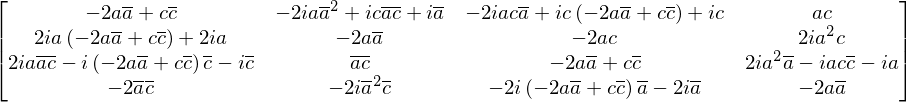

In [56]:
X**2 + X + X**3